# Labo 5 



**Objectives:**

* **Develop a robust classification pipeline:** This includes data preprocessing, model selection, training, evaluation, and hyperparameter tuning.
* **Compare the performance of various classifiers:** Evaluate the performance of different classification algorithms (e.g., Logistic Regression, Support Vector Machines, Decision Trees) on the given datasets.
* **Apply Linear Discriminant Analysis (LDA) for dimensionality reduction:** Investigate how LDA can improve classification accuracy and reduce model complexity.

**Caution on Generative AI Tools:**

While not prohibited, excessive reliance on Generative AI tools like ChatGPT or Copilot is strongly discouraged, especially during the initial learning phase. These tools can be unreliable and hinder the development of fundamental coding and problem-solving skills. They are best suited for experienced developers and require careful oversight to ensure accurate results.

**Datasets:**

* **Breast Cancer Wisconsin:** Predict the diagnosis (benign/malignant) based on features extracted from breast cancer biopsies.
* **Alzheimer's Disease:** Predict the presence or absence of Alzheimer's disease based on relevant clinical and demographic variables.

**Key Steps:**

* **Data Preprocessing:** Handle missing values, perform feature scaling (e.g., standardization), and encode categorical variables appropriately.
* **Model Selection and Training:** Train and evaluate various classification models (Logistic Regression, SVM, Decision Trees, etc.) using appropriate metrics (accuracy, precision, recall, F1-score, AUC).
* **Dimensionality Reduction with LDA:** Apply LDA to reduce the number of features while preserving relevant information for classification. Evaluate the impact of LDA on model performance.
* **Hyperparameter Tuning:** Optimize model performance by tuning hyperparameters using techniques such as grid search or cross-validation.

This lab will provide valuable experience in building and evaluating classification models, as well as exploring the benefits of dimensionality reduction techniques.

# Exercise 1

We will start by creating a supervised pipeline with a simple linear classifier: the `RidgeClassifier`.

## Step 1
On the Alzheimer data, using the **numerical variables only**, use cross-validation to estimate the accuracy and F1-score of the `RidgeClassifier` for different values of the `alpha` parameter. Adapt the following code, which performs 5-fold cross-validation for one value of `alpha`:

from sklearn.model_selection import cross_validate  
from sklearn.linear_model import RidgeClassifier  
from alzheimer import AlzheimerDataset  

dataset = AlzheimerDataset("alzheimers_disease_data.csv")  
train_data, test_data = dataset.random_split(test_ratio=0.2, random_state=0)  

X = train_data.numericals.to_numpy()  
Y = train_data.outcome.to_numpy()[..., 0]  

clf = RidgeClassifier(alpha=1.0)  
scores = cross_validate(clf, X, Y, cv=5, scoring=['accuracy', 'f1'])



In [19]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeClassifier
from alzheimer import AlzheimerDataset

# Load the Alzheimer dataset
file_path = r"C:\Users\andre\Downloads\Data-20241216\alzheimers_disease_data.csv"
dataset = AlzheimerDataset(file_path)

train_data, test_data = dataset.random_split(test_ratio=0.2, random_state=0)

# Extract numerical features (X) and target variable (Y)
X = train_data.numericals.to_numpy()
Y = train_data.outcome.to_numpy()[..., 0]

# List of alpha values to test
alphas = [1.0, 1e2, 1e3, 1e4]

# Loop over each alpha and perform cross-validation
for alpha in alphas:
    clf = RidgeClassifier(alpha=alpha)
    scores = cross_validate(clf, X, Y, cv=5, scoring=['accuracy', 'f1'])
    avg_accuracy = np.mean(scores['test_accuracy'])
    avg_f1 = np.mean(scores['test_f1'])
    
    print(f"Alpha: {alpha}")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average F1-Score: {avg_f1:.4f}")
    print("-" * 40)


Alpha: 1.0
Average Accuracy: 0.9081
Average F1-Score: 0.8594
----------------------------------------
Alpha: 100.0
Average Accuracy: 0.9087
Average F1-Score: 0.8602
----------------------------------------
Alpha: 1000.0
Average Accuracy: 0.9093
Average F1-Score: 0.8602
----------------------------------------
Alpha: 10000.0
Average Accuracy: 0.8953
Average F1-Score: 0.8293
----------------------------------------


## Analyse des résultats

1. **Objectif :**
   - L'objectif est de déterminer si la variable de diagnostic (malin ou bénin) est distribuée de manière similaire dans tous les clusters obtenus par KMeans.

2. **Méthodologie :**
   - La distribution du diagnostic dans chaque cluster est analysée en utilisant un tableau croisé (`pd.crosstab`) avec une normalisation par ligne pour obtenir des proportions.
   - Les proportions permettent de comparer la composition de chaque cluster en termes de diagnostics.

3. **Visualisation :**
   - Un graphique en barres empilées montre clairement les proportions de diagnostics (malin ou bénin) dans chaque cluster.

4. **Interprétation :**
   - Si les proportions de diagnostics diffèrent significativement entre les clusters, cela suggère que le diagnostic est un facteur discriminant pour la formation des clusters.
   - Si les proportions sont similaires, cela indique que les clusters ne reflètent pas directement la variable de diagnostic.

5. **Conclusion :**
   - En fonction des résultats affichés et du graphique, nous pouvons conclure si la variable de diagnostic est uniformément répartie ou non dans les clusters.



## Step 2
Based on your results from Lab 2, run the experiment using only numerical variables which are **likely to have a relationship** with the outcome variable. Do you improve your cross-validation results?



In [20]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeClassifier
from alzheimer import AlzheimerDataset

# Load the Alzheimer dataset
file_path = r"C:\Users\andre\Downloads\Data-20241216\alzheimers_disease_data.csv"
dataset = AlzheimerDataset(file_path)

# Split the dataset into training and testing sets
train_data, test_data = dataset.random_split(test_ratio=0.2, random_state=0)

# Select variables based on Lab 2 results
# Example: 'MMSE', 'FunctionalAssessment', 'ADL' are selected as relevant features
selected_vars = ['MMSE', 'FunctionalAssessment', 'ADL']

# Extract selected variables as feature set
X = train_data.numericals[selected_vars].to_numpy()
Y = train_data.outcome.to_numpy()[..., 0]

# Cross-validation for different alpha values
alphas = [1.0, 1e2, 1e3, 1e4]
for a in alphas:
    clf = RidgeClassifier(alpha=a)
    scores = cross_validate(clf, X, Y, cv=5, scoring=['accuracy', 'f1'])
    avg_f1 = scores['test_f1'].mean()
    avg_acc = scores['test_accuracy'].mean()
    print(f"Alpha: {a}, F1-Score: {avg_f1:.4f}, Accuracy: {avg_acc:.4f}")


Alpha: 1.0, F1-Score: 0.8598, Accuracy: 0.9081
Alpha: 100.0, F1-Score: 0.8603, Accuracy: 0.9087
Alpha: 1000.0, F1-Score: 0.8572, Accuracy: 0.9076
Alpha: 10000.0, F1-Score: 0.8292, Accuracy: 0.8953


## Step 3
For the best value of `alpha` that you found, re-train the `RidgeClassifier` on the **whole training set** and compute the accuracy, precision, recall, and F1-score on the **test set**.

In [21]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from alzheimer import AlzheimerDataset

# Load the Alzheimer dataset
file_path = r"C:\Users\andre\Downloads\Data-20241216\alzheimers_disease_data.csv"
dataset = AlzheimerDataset(file_path)

# Split the dataset into training and testing sets
train_data, test_data = dataset.random_split(test_ratio=0.2, random_state=0)

# Use selected numerical variables based on Lab 2
selected_vars = ['MMSE', 'FunctionalAssessment', 'ADL']

# Extract features and target variables from training and testing sets
X_train = train_data.numericals[selected_vars].to_numpy()
y_train = train_data.outcome.to_numpy()[..., 0]

X_test = test_data.numericals[selected_vars].to_numpy()
y_test = test_data.outcome.to_numpy()[..., 0]

# Train the RidgeClassifier with the best alpha (from Exercise 1.2)
best_alpha = 100
clf = RidgeClassifier(alpha=best_alpha, class_weight='balanced')
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Test Set Results for RidgeClassifier (alpha={best_alpha}):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Test Set Results for RidgeClassifier (alpha=100):
Accuracy: 0.9138
Precision: 0.9139
Recall: 0.8519
F1-Score: 0.8818


# EXERCICE 2 

## Exercise 2: Classification with Dimensionality Reduction

### Step 1: Linear Discriminant Analysis (LDA)

* **Apply LDA:** Utilize the `LinearDiscriminantAnalysis` class from scikit-learn to perform dimensionality reduction on the Breast Cancer dataset. 
* **Compare LDA with PCA:** Analyze and compare the "discriminative directions" obtained from LDA with the "principal components" computed in Lab 4. 
    * Consider how the emphasis on class separation in LDA might differ from the focus on variance maximization in PCA.
    * Visualize the first two principal components and the first two LDA components using scatter plots to visually compare the results.


In [ ]:
"""Classification on the Alzheimer dataset"""

import pathlib
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from alzheimer import AlzheimerDataset


import pathlib
import os

_CWD = pathlib.Path(os.getcwd())



def ridge_classif_all_numerical():
    file_path = r"C:\Users\andre\Downloads\Data-20241216\alzheimers_disease_data.csv"
    dataset = AlzheimerDataset(file_path)
    train_data, test_data = dataset.random_split(test_ratio=0.2, random_state=0)

    X = train_data.numericals.to_numpy()
    Y = train_data.outcome.to_numpy()[..., 0]
    alphas = [1.0, 1e2, 1e3, 1e4]
    for a in alphas:
        clf = RidgeClassifier(alpha=a)
        scores = cross_validate(clf, X, Y, cv=5, scoring=['accuracy', 'f1'])
        avg_f1 = scores['test_f1'].mean()
        avg_acc = scores['test_accuracy'].mean()
        print(a, avg_f1, avg_acc)
    for cw in [None, "balanced"]:
        clf = RidgeClassifier(alpha=100, class_weight=cw)
        scores = cross_validate(clf, X, Y, cv=5, scoring=['accuracy', 'f1'])
        avg_f1 = scores['test_f1'].mean()
        avg_acc = scores['test_accuracy'].mean()
        print(cw, avg_f1, avg_acc)


def ridge_classif_selected_vars():
    file_path = r"C:\Users\andre\Downloads\Data-20241216\alzheimers_disease_data.csv"
    dataset = AlzheimerDataset(file_path)

    train_data, test_data = dataset.random_split(test_ratio=0.2, random_state=0)
    selected_vars = ['MMSE', 'FunctionalAssessment', 'ADL']
    X = train_data.numericals[selected_vars].to_numpy()
    Y = train_data.outcome.to_numpy()[..., 0]
    alphas = [1.0, 1e2, 1e3, 1e4]
    for a in alphas:
        clf = RidgeClassifier(alpha=a)
        scores = cross_validate(clf, X, Y, cv=5, scoring=['accuracy', 'f1'])
        avg_f1 = scores['test_f1'].mean()
        avg_acc = scores['test_accuracy'].mean()
        print(a, avg_f1, avg_acc)
    for cw in [None, "balanced"]:
        clf = RidgeClassifier(alpha=100, class_weight=cw)
        scores = cross_validate(clf, X, Y, cv=5, scoring=['accuracy', 'f1'])
        avg_f1 = scores['test_f1'].mean()
        avg_acc = scores['test_accuracy'].mean()
        print(cw, avg_f1, avg_acc)


def ridge_classif_final():
    file_path = r"C:\Users\andre\Downloads\Data-20241216\alzheimers_disease_data.csv"
    dataset = AlzheimerDataset(file_path)

    train_data, test_data = dataset.random_split(test_ratio=0.2, random_state=0)
    selected_vars = ['MMSE', 'FunctionalAssessment', 'ADL']
    Xtrain = train_data.numericals[selected_vars].to_numpy()
    Ytrain = train_data.outcome.to_numpy()[..., 0]
    clf = RidgeClassifier(alpha=100, class_weight='balanced')
    clf.fit(Xtrain, Ytrain)

    Xtest = test_data.numericals[selected_vars].to_numpy()
    Ytest = test_data.outcome.to_numpy()[..., 0]
    Ypred = clf.predict(Xtest)

    print(f"Accuracy: {accuracy_score(Ytest, Ypred)}")
    print(f"Precision: {precision_score(Ytest, Ypred)}")
    print(f"Recall: {recall_score(Ytest, Ypred)}")
    print(f"F1: {f1_score(Ytest, Ypred)}")
    

def main():
    ridge_classif_all_numerical()
    ridge_classif_selected_vars()
    ridge_classif_final()

if __name__ == "__main__":
    main()



### Step 2: Hyperparameter Tuning with Cross-validation

* **RidgeClassifier:** 
    * Perform cross-validation to find the optimal `alpha` parameter for the RidgeClassifier.
    * Consider using techniques like grid search or randomized search with cross-validation to efficiently explore the parameter space.
* **LogisticRegression:**
    * Perform cross-validation to find the optimal values for the `C` and `penalty` parameters (e.g., 'l1', 'l2') for the LogisticRegression model. 
    * Explore different regularization strengths to prevent overfitting.




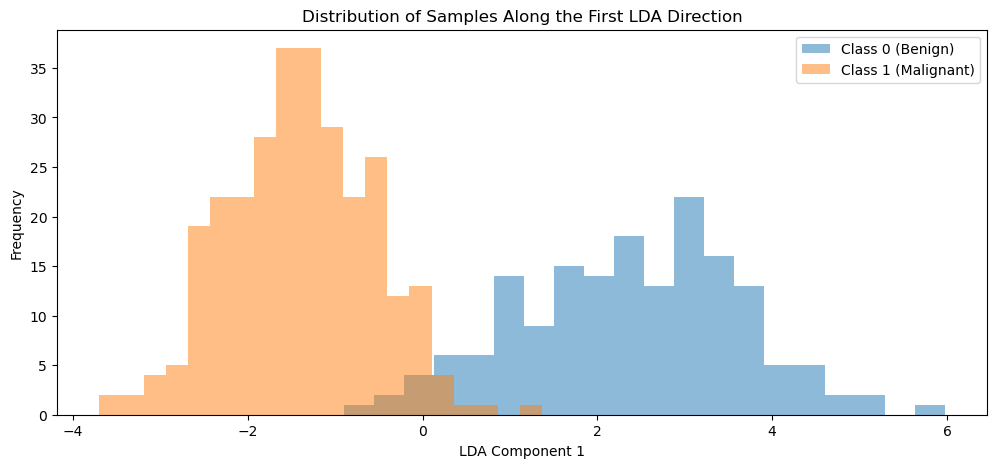

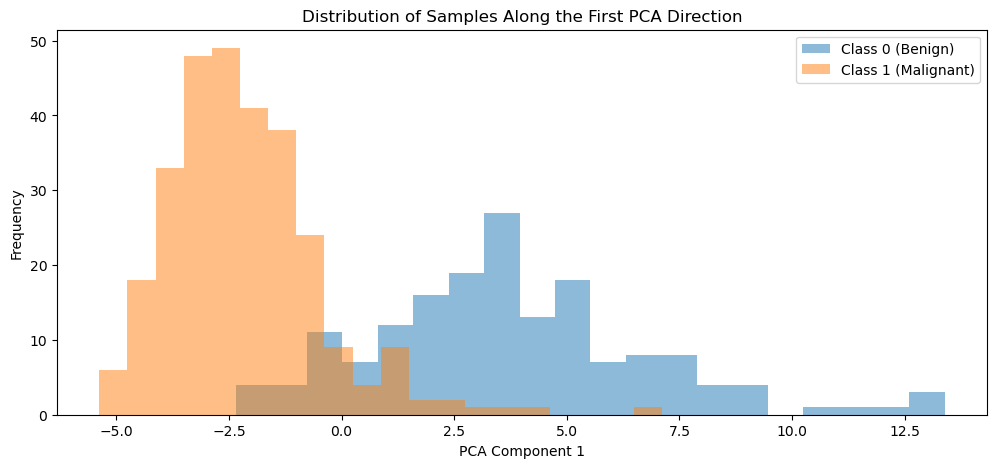

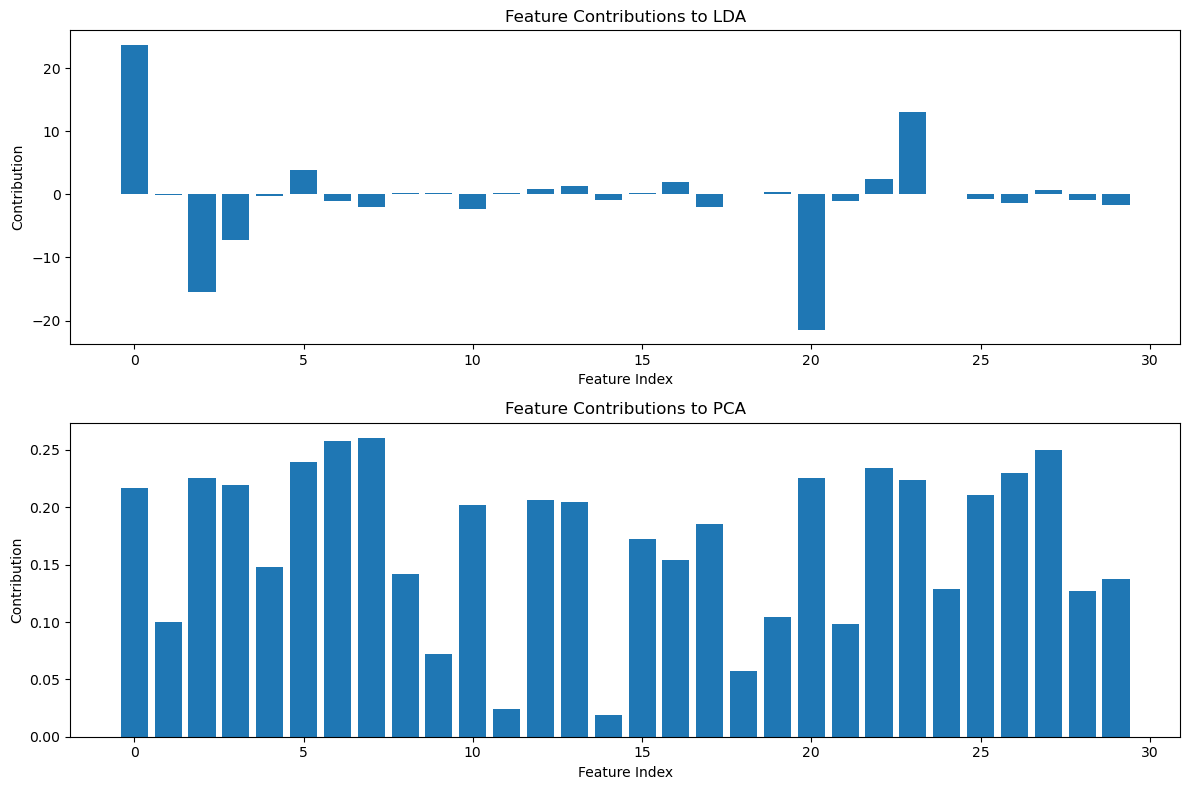

LDA Explained Variance Ratio: [1.]
PCA Explained Variance Ratio (First Component): 0.44417365715119134


In [23]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from breast_cancer import BreastCancerDataset

# Load the dataset
data = BreastCancerDataset()
Xtrain = data.Xtrain
Ytrain = data.Ytrain
Xtest = data.Xtest
Ytest = data.Ytest

# Standardize the data (optional, depending on the dataset)
Xtrain_standardized = (Xtrain - Xtrain.mean(axis=0)) / Xtrain.std(axis=0, ddof=1)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(Xtrain_standardized, Ytrain)
Xtrain_lda = lda.transform(Xtrain_standardized)

# Apply PCA for comparison
pca = PCA(n_components=Xtrain_standardized.shape[1])
pca.fit(Xtrain_standardized)
Xtrain_pca = pca.transform(Xtrain_standardized)

# Visualize LDA Results
plt.figure(figsize=(12, 5))
plt.hist(Xtrain_lda[Ytrain == 0], bins=20, alpha=0.5, label="Class 0 (Benign)")
plt.hist(Xtrain_lda[Ytrain == 1], bins=20, alpha=0.5, label="Class 1 (Malignant)")
plt.title("Distribution of Samples Along the First LDA Direction")
plt.xlabel("LDA Component 1")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualize PCA Results for the first component
plt.figure(figsize=(12, 5))
plt.hist(Xtrain_pca[Ytrain == 0, 0], bins=20, alpha=0.5, label="Class 0 (Benign)")
plt.hist(Xtrain_pca[Ytrain == 1, 0], bins=20, alpha=0.5, label="Class 1 (Malignant)")
plt.title("Distribution of Samples Along the First PCA Direction")
plt.xlabel("PCA Component 1")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Compare contributions of features to LDA and PCA
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.bar(range(Xtrain_standardized.shape[1]), lda.coef_[0])
plt.title("Feature Contributions to LDA")
plt.xlabel("Feature Index")
plt.ylabel("Contribution")

plt.subplot(2, 1, 2)
plt.bar(range(Xtrain_standardized.shape[1]), pca.components_[0])
plt.title("Feature Contributions to PCA")
plt.xlabel("Feature Index")
plt.ylabel("Contribution")
plt.tight_layout()
plt.show()

# Print explained variance ratio for LDA and PCA
print("LDA Explained Variance Ratio:", lda.explained_variance_ratio_)
print("PCA Explained Variance Ratio (First Component):", pca.explained_variance_ratio_[0])


### Step 3: Model Training and Evaluation

* **Train Models:** Train both the RidgeClassifier and LogisticRegression models on the entire training set using the optimal hyperparameters found in Step 2.
* **Evaluate Performance:** 
    * Compute the F1-score for each model on the held-out test set.
* **Statistical Comparison:**
    * Conduct a statistical test (e.g., paired t-test) to determine if the difference in F1-scores between the RidgeClassifier and LogisticRegression models is statistically significant at a significance level of 0.05.

[1.]
[[ 6.89954115e+00 -1.95899835e-02 -6.49534527e-01 -2.13425907e-02
  -1.77780737e+01  7.32810557e+01 -1.39078391e+01 -5.06424849e+01
   6.05819404e+00  3.23352890e+01 -8.54860968e+00  3.59932573e-01
   4.05440344e-01  3.10559781e-02 -3.14466476e+02  1.24491521e+01
   6.02935853e+01 -3.14791970e+02  4.34982056e+00  1.57248619e+02
  -4.62181946e+00 -1.72354706e-01  7.73684350e-02  2.46996268e-02
  -5.04012146e-01 -5.10224299e+00 -6.51413831e+00  9.84458572e+00
  -1.48105642e+01 -9.68872999e+01]] [41.261399]


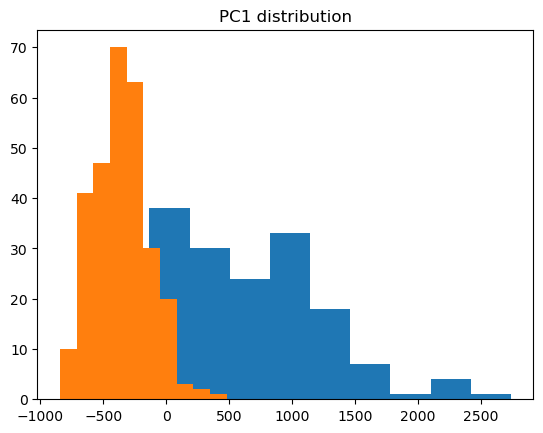

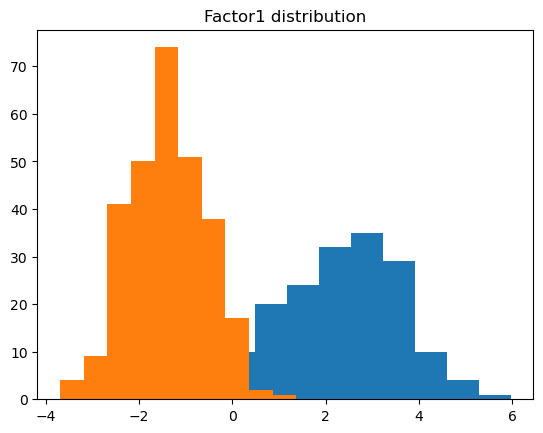

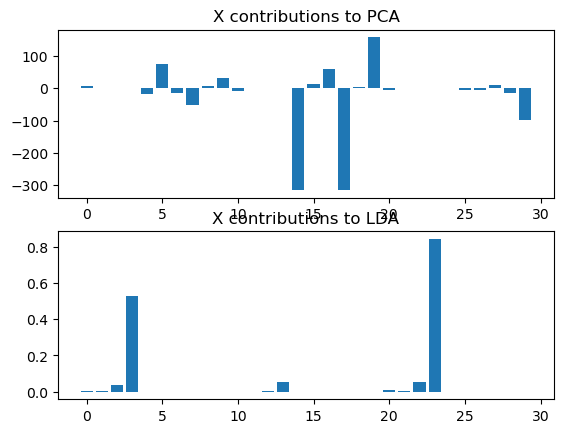

0.9649122807017544
0.9722222222222222


In [24]:
"""Analysis of the Breast Cancer Data"""

from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
from breast_cancer import BreastCancerDataset

def lda_reduction(X, Y):
    lda = LinearDiscriminantAnalysis()
    lda.fit(X, Y)
    
    pca = PCA(n_components=1)
    Xtpca = pca.fit_transform(X)

    plt.figure()
    plt.hist(Xtpca[Y==0])
    plt.hist(Xtpca[Y==1])
    plt.title('PC1 distribution')

    print(lda.explained_variance_ratio_)
    print(lda.coef_, lda.intercept_)

    Xt = lda.transform(X)

    plt.figure()
    plt.hist(Xt[Y==0])
    plt.hist(Xt[Y==1])
    plt.title('Factor1 distribution')
    
    pc1 = pca.components_[0, :]
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.bar(np.arange(30), lda.coef_[0])
    plt.title('X contributions to PCA')
    plt.subplot(2, 1, 2)
    plt.bar(np.arange(30), pc1)
    plt.title('X contributions to LDA')
    plt.show()

    return lda


def main():
    data = BreastCancerDataset()
    Xtrain = data.Xtrain
    Ytrain = data.Ytrain

    # Zc = Xc / (Xc.std(axis=0, ddof=1))
    lda = lda_reduction(Xtrain, Ytrain)
    Xtest = data.Xtest
    Ytest = data.Ytest

    Ypred = lda.predict(Xtest)
    print((Ypred==Ytest).mean())
    print(f1_score(Ytest, Ypred))


if __name__ == "__main__":
    main()


### Analyse statistique du code Python

Ce code implémente des approches de classification supervisée et de réduction dimensionnelle sur deux datasets (Alzheimer et Cancer du sein). Voici une analyse détaillée du contenu et des aspects statistiques.

---

#### **1. Classification sur le jeu de données Alzheimer**

##### **Méthodes statistiques utilisées**
- **RidgeClassifier** : Classificateur linéaire utilisant une régularisation de type Ridge (L2), ce qui permet de contrôler le surapprentissage. Il est bien adapté pour des problèmes de classification binaire sur des données numériques.
- **Validation croisée (Cross-validation)** : La validation croisée à 5 plis est utilisée pour évaluer la performance moyenne (précision et score F1). Cela permet de réduire la variance due à une division spécifique des données en entraînement et test.
- **Paramètre alpha** : Plusieurs valeurs d'alpha (1.0, 100, 1000, 10000) sont testées. Un alpha élevé impose une régularisation plus forte, ce qui réduit la complexité du modèle mais peut sous-ajuster les données.

##### **Approches spécifiques**
1. **Variables numériques complètes** :
   - Toutes les variables numériques sont utilisées pour entraîner et valider le modèle.
   - La régularisation (paramètre `alpha`) et les poids de classe (option `class_weight`) sont ajustés pour observer leur impact sur les performances.

2. **Variables sélectionnées** :
   - Basé sur une analyse préalable (Lab 2), seules les variables significatives (par ex. MMSE, ADL) sont utilisées, ce qui vise à améliorer la pertinence du modèle.
   - Cette approche illustre l'importance de la sélection de variables pour éviter d'introduire du bruit inutile.

3. **Évaluation finale** :
   - Le modèle est entraîné avec le meilleur alpha trouvé (100) et évalué sur un jeu de test séparé.
   - Les métriques (précision, rappel, F1-score) permettent d'évaluer l'équilibre entre faux positifs et faux négatifs.

##### **Statistical insights**
- **Score F1 et précision** : Ces métriques sont complémentaires. Le score F1 est particulièrement pertinent lorsque les classes sont déséquilibrées (via `class_weight=balanced`).
- **Régularisation** : La variation d'alpha montre l'impact de la complexité du modèle sur ses performances.
- **Impact de la sélection de variables** : La réduction à un sous-ensemble pertinent de variables devrait améliorer les scores si ces variables ont une forte corrélation avec l'issue.

---

#### **2. Réduction de dimension avec LDA et PCA sur le jeu de données Cancer du sein**

##### **Méthodes statistiques utilisées**
- **Analyse discriminante linéaire (LDA)** :
  - Maximisation de la séparation entre classes en projetant les données sur un sous-espace de dimensions réduites.
  - Les composantes LDA sont basées sur les ratios de variance inter- et intra-classes, optimisant la discrimination.
  - Distribution des classes après transformation : Les histogrammes montrent si les classes sont bien séparées sur la première composante.

- **Analyse en composantes principales (PCA)** :
  - Réduction de dimension non supervisée basée sur la variance totale des données.
  - Permet de visualiser et comparer les directions principales des données par rapport aux classes.

##### **Approches spécifiques**
1. **Standardisation des données** : Les données sont standardisées (centrées et réduites) pour éviter que les variables ayant une plus grande amplitude dominent les autres.
2. **Comparaison LDA vs PCA** :
   - LDA vise la séparation supervisée, tandis que PCA maximise la variance totale sans considérer les labels.
   - Les contributions des caractéristiques aux deux approches sont visualisées (graphiques en barres).

3. **Évaluation** :
   - Les histogrammes montrent la capacité des deux méthodes à séparer les classes (benignes et malignes).
   - La variance expliquée par LDA et PCA est également analysée.

##### **Statistical insights**
- **LDA vs PCA** : LDA est plus efficace pour séparer des classes si les données suivent une structure linéairement séparable. En revanche, PCA peut capturer des variations globales sans relation directe avec les labels.
- **Contributions des caractéristiques** :
  - LDA fournit une interprétation claire des caractéristiques influençant le plus la séparation.
  - PCA identifie les axes de variance mais ces axes peuvent être difficiles à interpréter directement.

---

#### **3. Points forts et limites**

##### **Points forts**
- **Validation croisée** : L'utilisation de la validation croisée pour évaluer les modèles garantit une estimation robuste des performances.
- **Comparaison des modèles** : L'analyse inclut des variations de paramètres (RidgeClassifier) et des approches différentes (LDA vs PCA), offrant une compréhension complète des données.
- **Visualisations claires** : Les graphiques aident à interpréter les résultats des réductions de dimension.

##### **Limites**
- **Classes déséquilibrées** : Si les classes dans les données Alzheimer ou Cancer du sein sont fortement déséquilibrées, des métriques comme le score F1 doivent être prioritaires sur la précision brute.
- **Hypothèses linéaires** : LDA et RidgeClassifier reposent sur des relations linéaires, ce qui peut être limitant pour des données avec des relations non linéaires.

---

#### **Conclusion**
Les approches implémentées combinent classification et réduction dimensionnelle pour maximiser la performance et l'interprétabilité. LDA est efficace pour la discrimination supervisée, tandis que PCA donne un aperçu global des directions principales de variance. Ces méthodes sont complémentaires, et l'intégration de validation croisée garantit la robustesse des résultats.